# Global Agriculture Supply: How Climate Impacts on Agriculture Supply

**Project proposal**

# 1 Aims, objectives and background
## 1.1	Introduction

Climate change, or the continual rise in the global average temperature, is by far the most popular topic in the world. Deserts are spreading as a result of climate change, and heat waves are becoming more prevalent. Higher temperatures also increase the frequency of natural disasters such as storms, flooding, and drought. These occurrences have an effect on human settlements and infrastructure. Rising temperatures threaten food security and availability to clean water. Crop production has been greatly impacted because water is a critical resource for cultivating plants.

Channel News Asia, a Singaporean multinational news channel, sparked the idea for this project. This news article explores the effects of climate change on Japanese wasabi farmers[[1]](#news). It interviewed a Japanese farmer, who expressed concern about the increased frequency and severity of storms, as well as rising temperatures, induced by climate change. The annual wasabi output has decreased as a result of this circumstance.

## 1.2	Aims and objectives
I wanted to explore the possibility of utilizing data science approaches to summarize my dataset on how climate change affects agricultural supplies. I plan to conduct study on the relationship between climate change and agricultural productivity, as well as what is causing the increase in global temperature at a greater level.

I decided to focus on world agriculture land percentage and choose a suitable country that is severely impacted by global warming. To my knowledge, no data science methodologies have been used for detail work analysis on this topic.

For this project proposal, my aims are to:

* Determine which country should be used for a more in-depth analysis.
* Clean and modify the data so that it can be used in the approaches I want to apply later.
* Select some specific data from different dataframe and store it in a new dataframe for data analysis.
* Conduct exploratory data analysis to uncover trends in the data that allow for additional analysis.


## 1.3 Data
### 1.3.1 Data requirements
World Temperature change, $CO_{2}$ emissions and agriculture land percentage were chosen because with more than 3 different dataset, it becomes difficult to establish relation and detecting a trend between the dataset. Graphs and visualisations will get more complex, making it more difficult for readers to analyse the data.I am hoping to derive the perfect conclusion for my data analysis topic from the dataset.

For a more in-depth look at data analysis for this topic, I will pick a country with the most noticeable change in agriculture land percentage from 1990 to 2020. This will provide readers with clear evidence of how climate affects agricultural supply.

### 1.3.2 Choice of Article
The article that inspired this exploratory data analysis project:

Channel News Asia stated on July 12, 2022, Japanese wasabi farmers fear for future amid climate change[[1]](#news). 
### 1.3.3 Choice of Dataset
The references at the end of the project contain a more detailed citation [References](#references).

Dataset sources and types of data choosen:
* The Food and Agriculture Organization (FAO) https://www.fao.org/faostat/en/#compare is a United Nations specialised body that leads global efforts to eliminate hunger. It is an open-source website that collects data on food and agriculture issues around the world. This website supplied the datasets World Temperature Change, World $CO_{2}$ Emissions and Puerto Rico country Temperature Change.
* The World Bank https://data.worldbank.org/indicator/AG.LND.AGRI.ZS is a website with open data resources that shares and applies innovative knowledge and solutions to the problems it faces. This website supplied the dataset of the World Agriculture Land Percentage.
* The Climate Change Knowledge Portal https://climateknowledgeportal.worldbank.org/country/puerto-rico/vulnerability is an open data website offering global data on past and predicted climate, vulnerabilities, and consequences. The website supplied the dataset of the Puerto Rico country natural hazard statistics.

## 1.4 Ethical considerations
### 1.4.1 Use of dataset
None of the dataset found and use in this project is from a closed source website. All datasets are from open-source website and the way I used the datasets is all allow in their terms and condition. All references used in the project has already made its own recommended citation.

* The Food and Agriculture Organization (FAO) has stated in their terms and condition that "FAO is committed to making its content freely available and encourages the use, reproduction and dissemination of the text, multimedia and data presented" and "FAO encourages users to establish hyperlinks to the FAO website and prior permission is not required."
* The World Bank has stated in their terms and condition that "Unless indicated otherwise in the data or indicator metadata, you are free to copy, distribute, adapt, display or include the data in other products for commercial or noncommercial purposes at no cost under a Creative Commons Attribution 4.0 International License". No indication otherwise in the data or indicator metadata was found in the datasets.
* The Climate Change Knowledge Portal is a subsite of the World Bank website. As a result, the terms and conditions for the data utilised are exactly the same.

### 1.4.2 Onward use / reuseage of data and derived data
Anyone wishing to use the source dataset must follow the terms and conditions of each website at the moment and get permission for usage independently when necessary.

The analysis and conclusions made in this project are entirely my own.

# 2 Import Libraries and Load Dataset
For my project, I will be utilising the numpy, pandas, seaborn, matplotlib and regular expressions libraries.
* Numpy is used for statistics calculation
* Pandas is used for reading csv file to dataframe and data manipulation
* Seaborn is used for data analysis (plot graph)
* Matplotlib is also used for data analysis (plot graph)
* Regular expressions are used to determine whether a given string matches a given regular expression.

In [1]:
#import libraries & modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

#to make the line plot display inline with the code
%matplotlib inline

# Set all graphs to a seaborn style with a grey background grid which makes reading graphs easier
sns.set()

The code below read a Comma Separated Values (csv) file into DataFrame. Puerto Rico's dataset was selected because of the huge land percentage difference between 1990 and 2020 calculated in the below "Statistics Math Counting" category cell.[[2]](#statistics) This dataset will be used for more detailed analysis below.

In [2]:
# world dataset
world_temp = pd.read_csv('FAOSTAT_data_en_12-21-2022(world_temp).csv')
world_co2 = pd.read_csv('FAOSTAT_data_en_12-27-2022(world_co2).csv')
# skips the first 4 row as it contains the dataset source information
world_agri_pc = pd.read_csv('world_agriculture_land_per.csv',skiprows=4)

# puerto rico dataset
rico_temp = pd.read_csv('FAOSTAT_data_en_12-29-2022(puerto_rico_temp).csv')
rico_hazard = pd.read_csv('key-natural-hazard-statistics-for-1980-2020(puerto_rico).csv')

# 3 Data cleaning and selecting

Before analysing the dataset, it should be cleaned, and some selection should be made to select the data that will be processed. Some of the raw datasets are incomplete or very large. It would contains a lot of information that isn't required, thus data selection will be done based on what the issue requires. Data cleaning will also include the removal of unnecessary variables and values from the dataset as well as the removal of any inconsistencies.

Steps required:

* Remove missing values, outliers, and extraneous rows or columns from the dataset.   
* Select a range or specific variables from the dataset. 
* Update and reformat our data.
* Combining datasets

## 3.1 Check Dataset
We need to verify that the required csv file data was accurately read into the dataframe and that it is not outside of the expected constraints. We can check whether the dataframe's content matches the title by examining the first and last 5 rows of the dataframe. Data from Puerto Rico was selected as an example because of the huge land percentage difference between 1990 and 2020 calculated in the below "Statistics Math Counting" category cell.[[2]](#statistics)

* World Temperature Change Dataframe
* World $CO_{2}$ Emissions Dataframe
* World Agriculture Land Percentage Dataframe
* Puerto Rico Temperature Change Dataframe
* Puerto Rico Natural Hazard Dataframe


### 3.1.1 World Temperature Change Dataframe

The code below retrieves the first and last five rows from the "World Temperature Change" dataframe.

In [3]:
#first 5 rows in the dataframe
world_temp.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1990,1990,°C,0.645,E,Estimated value
1,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1991,1991,°C,0.470,E,Estimated value
2,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1992,1992,°C,0.187,E,Estimated value
3,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1993,1993,°C,0.352,E,Estimated value
4,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1994,1994,°C,0.510,E,Estimated value


In [4]:
#last 5 rows in the dataframe
world_temp.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
26,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,2016,2016,°C,1.658,E,Estimated value
27,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,2017,2017,°C,1.424,E,Estimated value
28,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,2018,2018,°C,1.284,E,Estimated value
29,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,2019,2019,°C,1.449,E,Estimated value
30,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,2020,2020,°C,1.713,E,Estimated value


### 3.1.2 World $CO_{2}$ emissions Dataframe

The code below retrieves the first and last five rows from the "World $CO_{2}$ Emission" dataframe.

In [5]:
#first 5 rows in the dataframe
world_co2.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,1990,1990,3050,FAO TIER 1,kilotonnes,2.469343e+07,E,Estimated value,NaN
1,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,1991,1991,3050,FAO TIER 1,kilotonnes,2.527116e+07,E,Estimated value,NaN
2,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,1992,1992,3050,FAO TIER 1,kilotonnes,2.501595e+07,E,Estimated value,NaN
3,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,1993,1993,3050,FAO TIER 1,kilotonnes,2.519721e+07,E,Estimated value,NaN
4,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,1994,1994,3050,FAO TIER 1,kilotonnes,2.529548e+07,E,Estimated value,NaN


In [6]:
#last 5 rows in the dataframe
world_co2.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
26,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,2016,2016,3050,FAO TIER 1,kilotonnes,3.761653e+07,E,Estimated value,NaN
27,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,2017,2017,3050,FAO TIER 1,kilotonnes,3.805950e+07,E,Estimated value,NaN
28,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,2018,2018,3050,FAO TIER 1,kilotonnes,3.905875e+07,E,Estimated value,NaN
29,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,2019,2019,3050,FAO TIER 1,kilotonnes,3.927869e+07,E,Estimated value,NaN
30,GT,Emissions Totals,5000,World,7273,Emissions (CO2),6825,All sectors with LULUCF,2020,2020,3050,FAO TIER 1,kilotonnes,3.711517e+07,E,Estimated value,NaN


### 3.1.3 World Agriculture Land Percentage Dataframe

The code below retrieves the first and last five rows from the "World Agirculture Land Percentage" dataframe.

In [6]:
#first 5 rows in the dataframe
world_agri_pc.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,42.345505,42.329995,42.366298,42.348112,42.330887,...,43.524271,43.674175,43.772496,43.901452,44.045088,44.168345,44.194846,44.248721,NaN,NaN
2,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.801696,57.893688,57.970348,58.066940,58.070006,...,58.123668,58.123668,58.123668,58.123668,58.123668,58.276988,58.276988,58.807476,NaN,NaN
3,Africa Western and Central,AFW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,32.945755,33.061986,33.318095,33.446227,33.712301,...,39.496319,39.520843,39.547318,39.643958,39.684770,39.707185,39.724829,39.742662,NaN,NaN
4,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,36.237443,36.261506,36.277549,36.301612,36.317655,...,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,45.682594,45.682594,NaN,NaN


In [7]:
#first 5 rows in the dataframe
world_agri_pc.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
261,Kosovo,XKX,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,44.201375,44.222210,44.244938,44.263879,44.282819,...,44.508211,44.418433,44.382446,44.293805,44.419190,44.419190,44.419190,44.419190,NaN,NaN
263,South Africa,ZAF,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,83.534610,82.545401,81.605652,80.579347,79.639598,...,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,NaN,NaN
264,Zambia,ZMB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,25.971563,26.042858,26.102046,26.176031,26.248672,...,31.929404,32.063923,32.063923,32.063923,32.063923,32.063923,32.063923,32.063923,NaN,NaN
265,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN,NaN


### 3.1.4 Puerto Rico Temperature Change Dataframe
The code below retrieves the first and last five rows from the "Puerto Rico Temperature Change" dataframe.

In [8]:
#first 5 rows in the dataframe
rico_temp.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,1990,1990,°C,0.469,E,Estimated value
1,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,1991,1991,°C,0.353,E,Estimated value
2,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,1992,1992,°C,0.300,E,Estimated value
3,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,1993,1993,°C,0.473,E,Estimated value
4,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,1994,1994,°C,0.677,E,Estimated value


In [9]:
#last 5 rows in the dataframe
rico_temp.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
26,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,2016,2016,°C,1.304,E,Estimated value
27,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,2017,2017,°C,1.044,E,Estimated value
28,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,2018,2018,°C,0.904,E,Estimated value
29,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,2019,2019,°C,1.054,E,Estimated value
30,ET,Temperature change,177,Puerto Rico,7271,Temperature change,7020,Meteorological year,2020,2020,°C,1.432,E,Estimated value


### 3.1.5 Puerto Rico Natural Hazard Dataframe
The code below retrieves the first and last five rows from the "Puerto Rico  Natural Hazard" dataframe.

In [10]:
#first 5 rows in the dataframe
rico_hazard.head()

,Category,Flood,Storm,Drought
0,1985,NaN,NaN,NaN
1,1989,NaN,2000.0,NaN
2,1992,600.0,NaN,NaN
3,1994,NaN,NaN,NaN
4,1995,NaN,98000.0,NaN


In [11]:
#last 5 rows in the dataframe
rico_hazard.tail()

,Category,Flood,Storm,Drought
13,2012,NaN,NaN,NaN
14,2014,NaN,NaN,NaN
15,2017,NaN,750000.0,NaN
16,2018,400.0,NaN,NaN
17,2020,NaN,NaN,NaN


Following all of the checks, it was determined that all of the required csv files were accurately read into the dataframe and that no errors were discovered.

## 3.2 Check for Missing Value
The dataset should be checked for any missing value as not all dataset is clean and uniform. Missing values must be handled with caution because they may lower the quality of our analysis. It can also result in incorrect predictions or classifications, as well as a strong bias for any specific model being employed.

* World Temperature Change Dataset
* World $CO_{2}$ emissions Dataset
* World Agriculture Land Percentage Dataset
* Puerto Rico Temperature Change Dataset
* Puerto Rico Natural Hazard Dataset

### 3.2.1 World Temperature Change Dataset

The code below finds for missing value from "World Temperature Change" dataset:

In [12]:
#finding missing value
world_temp.isnull().sum().sort_values(ascending = False)

Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

The output of the above cell shows that the globe temperature change dataset has no null or missing values.

### 3.2.2 World $CO_{2}$ emissions Dataset

The code below finds for missing value from "World $CO_{2}$ Emission" dataset:

In [13]:
#finding missing value
world_co2.isnull().sum().sort_values(ascending = False)

Note                31
Year                 0
Flag Description     0
Flag                 0
Value                0
Unit                 0
Source               0
Source Code          0
Domain Code          0
Domain               0
Item                 0
Item Code            0
Element              0
Element Code         0
Area                 0
Area Code            0
Year Code            0
dtype: int64

The output of the above cell shows that the "Note" variable in the world $CO_{2}$ emission dataset has 31 null value.

### 3.2.3 World Agriculture Land Percentage Dataset

The code below finds for missing value from "World Agriculture Land Percentage" dataset:

In [14]:
#finding missing value
world_agri_pc.isnull().sum().sort_values(ascending = False)

Unnamed: 66       266
2021              266
1960              266
1984               12
1978               12
                 ... 
2012                9
Indicator Code      0
Country Code        0
Indicator Name      0
Country Name        0
Length: 67, dtype: int64

The output of the above cell demonstrates that the variables "Unnamed," 2021, 1960, 1984, 1978, and 2012 in the world agriculture land percentage dataset have null values. The dataset's null values are given in descending order, beginning with the most and ending with the fewest.

### 3.2.4 Puerto Rico Temperature Change Dataframe
The code below finds for missing value from "Puerto Rico Temperature Change" dataset:

In [15]:
#finding missing value
rico_temp.isnull().sum().sort_values(ascending = False)

Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

The output of the above cell shows that the Puerto Rico temperature change dataset has no null or missing values.

### 3.2.5 Puerto Rico Natural Hazard Dataframe
The code below finds for missing value from "Puerto Rico Natural Hazard" dataset:

In [16]:
#finding missing value
rico_hazard.isnull().sum().sort_values(ascending = False)

Drought     18
Flood       14
Storm       11
Category     0
dtype: int64

The output of the above cell shows that the Puerto Rico Natural Hazard dataset has 18 null value in 'Drought', 14 in 'Flood' and 11 in 'Storm'.

## 3.3 Handling Missing Data
Any missing values identified in the dataframe will be removed or replaced. I'll reindex the dataframe after the missing value is removed so it's at the correct row position.

* World $CO_{2}$ emissions Dataset
* World Agriculture Land Percentage Dataset
* Puerto Rico Natural Hazard Dataset

### 3.3.1 World $CO_{2}$ emissions Dataset

The code below will remove columns with all of its values equal to "NULL" from the dataframe.

In [17]:
#remove NAN column from "Note" variable from the dataframe
world_co2.dropna(how='all',axis=1,inplace=True)

Check the dataset's remaining missing value count.

In [18]:
#checks for missing value
world_co2.isnull().sum().sort_values(ascending = False)

Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Source Code         0
Source              0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

The cell above indicates that the null value was fully eliminated from the dataframe.

### 3.3.2 World Agriculture Land Percentage Dataset

The code below will remove: 
* columns with all of its values equal to "NULL" from the dataframe
* rows with more than 30% of "NULL" value from the dataframe
* reindex the data

In [19]:
# remove column with all Null values from the dataframe
world_agri_pc.dropna(how='all',axis=1,inplace=True)

# remove row with more than 30% of Null values
percentage = 0.7 * len(world_agri_pc.axes[1])
world_agri_pc.dropna(axis=0,thresh=percentage,inplace=True)

# resetting the DataFrame index
world_agri_pc = world_agri_pc.reset_index()

Check the dataset's remaining missing value count.

In [20]:
#checks for missing value
world_agri_pc.isnull().sum().sort_values(ascending = False)

index    0
1989     0
1991     0
1992     0
1993     0
        ..
1983     0
1984     0
1985     0
1986     0
2020     0
Length: 65, dtype: int64

The cell above indicates that the null value was fully eliminated from the dataframe.

In [21]:
world_agri_pc

,index,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
1,1,Africa Eastern and Southern,AFE,Agricultural land (% of land area),AG.LND.AGRI.ZS,42.345505,42.329995,42.366298,42.348112,42.330887,...,46.361515,43.388794,43.524271,43.674175,43.772496,43.901452,44.045088,44.168345,44.194846,44.248721
2,2,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,57.801696,57.893688,57.970348,58.066940,58.070006,...,58.123668,58.123668,58.123668,58.123668,58.123668,58.123668,58.123668,58.276988,58.276988,58.807476
3,3,Africa Western and Central,AFW,Agricultural land (% of land area),AG.LND.AGRI.ZS,32.945755,33.061986,33.318095,33.446227,33.712301,...,39.105860,39.271519,39.496319,39.520843,39.547318,39.643958,39.684770,39.707185,39.724829,39.742662
4,4,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,36.237443,36.261506,36.277549,36.301612,36.317655,...,42.566024,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,45.682594,45.682594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,260,Samoa,WSM,Agricultural land (% of land area),AG.LND.AGRI.ZS,19.787986,20.141343,20.141343,20.141343,21.908127,...,16.961131,19.257951,21.554770,23.851590,26.720848,24.314488,22.302158,19.845324,17.773381,17.773381
250,262,"Yemen, Rep.",YEM,Agricultural land (% of land area),AG.LND.AGRI.ZS,44.201375,44.222210,44.244938,44.263879,44.282819,...,44.419190,44.511999,44.508211,44.418433,44.382446,44.293805,44.419190,44.419190,44.419190,44.419190
251,263,South Africa,ZAF,Agricultural land (% of land area),AG.LND.AGRI.ZS,83.534610,82.545401,81.605652,80.579347,79.639598,...,79.445054,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850
252,264,Zambia,ZMB,Agricultural land (% of land area),AG.LND.AGRI.ZS,25.971563,26.042858,26.102046,26.176031,26.248672,...,31.794886,32.063923,31.929404,32.063923,32.063923,32.063923,32.063923,32.063923,32.063923,32.063923


The cell above shows that the data was reindexed and sorted in the correct order. After removing rows having more than 30% "NULL" values, the number of rows of data was decreased from 265 to 253.

### 3.3.2  Puerto Rico Natural Hazard Dataset
The code below will remove:
* columns with all of its values equal to "NULL" from the dataframe.
* fill the missing value with the value of '0'

In [22]:
#remove NAN column from "Drought" variable from the dataframe
rico_hazard.dropna(how='all',axis=1,inplace=True)

# fill the missing value with the value of '0'
rico_hazard['Flood']=rico_hazard['Flood'].fillna(0)
rico_hazard['Storm']=rico_hazard['Storm'].fillna(0)

Check the dataset's remaining missing value count.

In [23]:
#checks for missing value
rico_hazard.isnull().sum().sort_values(ascending = False)

Category    0
Flood       0
Storm       0
dtype: int64

The cell above indicates that the null value was fully eliminated from the dataframe.

In [24]:
rico_hazard

,Category,Flood,Storm
0,1985,0.0,0.0
1,1989,0.0,2000.0
2,1992,600.0,0.0
3,1994,0.0,0.0
4,1995,0.0,98000.0
5,1996,0.0,57315.0
6,1998,0.0,0.0
7,1999,0.0,0.0
8,2001,9480.0,0.0
9,2003,2405.0,100.0


## 3.4 Remove Special Characters from the dataframe
If any special characters are identified, they will be removed from the dataframe using the regular expression library.

In [25]:
# Create a regex pattern to match all the stated characters
pattern = r'[~!#$^&*_{}:;\']+'
# Remove special characters from the world_temp dataframe
for i in world_temp:
    re.sub(pattern, '', str(world_temp[i]))

# Remove special characters from the world_co2 dataframe
for i in world_co2:
    re.sub(pattern, '', str(world_co2[i]))

# Remove special characters from the world_agri_pc dataframe
for i in world_agri_pc:
    re.sub(pattern, '', str(world_agri_pc[i]))

# Remove special characters from the rico_temp dataframe
for i in rico_temp:
    re.sub(pattern, '', str(rico_temp[i]))

# Remove special characters from the rico_hazard dataframe
for i in rico_hazard:
    re.sub(pattern, '', str(rico_hazard[i]))

## 3.5 Select and Remove Unnecessary Rows or Column
Some of the rows or columns are not required for the topic's subsequent data analysis. So, I will select the necessary data and delete the unnecessary from the dataframe.

### 3.5.1 World Agriculture Land Percentage Dataset
The code below finds the index of the variable "1961"

In [26]:
first_year = world_agri_pc.columns.get_loc('1961')
print("Index of column 1961 is: ",first_year)

Index of column 1961 is:  5


The code below removes unnecessary columns from the dataframe, which are from columns 1961 to 1989. Only data from 1990 to 2020 are required for the data analysis. Because data from 2000 to 2020 show that the world's agricultural land proportion begins to decline, but 20 years is insufficient to demonstrate the influence of climate change, an additional ten years were selected from the dataset.

In [27]:
for col in world_agri_pc.columns[5:]:
    if(col<='1989'):
        world_agri_pc.drop([col], axis=1,inplace=True)
        
world_agri_pc

,index,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
1,1,Africa Eastern and Southern,AFE,Agricultural land (% of land area),AG.LND.AGRI.ZS,44.077433,44.175529,44.364624,43.405047,43.602308,...,46.361515,43.388794,43.524271,43.674175,43.772496,43.901452,44.045088,44.168345,44.194846,44.248721
2,2,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,58.322984,58.307652,58.307652,58.160465,57.974947,...,58.123668,58.123668,58.123668,58.123668,58.123668,58.123668,58.123668,58.276988,58.276988,58.807476
3,3,Africa Western and Central,AFW,Agricultural land (% of land area),AG.LND.AGRI.ZS,35.127197,35.348954,35.558933,35.783595,36.091665,...,39.105860,39.271519,39.496319,39.520843,39.547318,39.643958,39.684770,39.707185,39.724829,39.742662
4,4,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,36.421930,36.546593,36.671255,36.795918,36.920581,...,42.566024,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,45.682594,45.682594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,260,Samoa,WSM,Agricultural land (% of land area),AG.LND.AGRI.ZS,19.081272,19.081272,18.374558,18.374558,18.021201,...,16.961131,19.257951,21.554770,23.851590,26.720848,24.314488,22.302158,19.845324,17.773381,17.773381
250,262,"Yemen, Rep.",YEM,Agricultural land (% of land area),AG.LND.AGRI.ZS,44.748755,44.758225,44.474118,44.936265,44.945736,...,44.419190,44.511999,44.508211,44.418433,44.382446,44.293805,44.419190,44.419190,44.419190,44.419190
251,263,South Africa,ZAF,Agricultural land (% of land area),AG.LND.AGRI.ZS,78.807013,79.140872,79.526663,79.908333,80.179542,...,79.445054,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850
252,264,Zambia,ZMB,Agricultural land (% of land area),AG.LND.AGRI.ZS,27.994727,28.014905,28.336405,28.520696,28.885242,...,31.794886,32.063923,31.929404,32.063923,32.063923,32.063923,32.063923,32.063923,32.063923,32.063923


<a id='statistics'><a>

## 3.6 Statistics Math Counting
### 3.6.1  World Agriculture Land Percentage Dataset

The code below calculates the global agriculture land percentage mean value from 1990 to 2020. The mean values will all be saved in a new variable named landpc_mean_values.

In [28]:
landpc_mean_values = []

for col in world_agri_pc.columns[5:]:
    mean = np.mean(world_agri_pc[col])
    #round the mean value to 2 decimal places
    landpc_mean_values.append(round(mean,2))
                       

The code below calculates the land percentage difference between 1990 and 2020. The value will all be saved in a new variable call country_per_diff.

In [29]:
country_per_diff = []

# finds the data of year 1990 and 2020
for row in world_agri_pc:
    if(row == '1990'):
        pc_1990 = world_agri_pc[row]
    if(row == '2020'):
        pc_2020 = world_agri_pc[row]
        
# calculates the land percentage difference
for x in range(0,len(pc_1990)):
    country_per_diff.append(pc_1990[x] - pc_2020[x])
    

The code below finds the country name with the highest land percentage difference between 1990 and 2020.

In [30]:
# find the maximum percentage difference in the list
max_diff = max(country_per_diff)

# finds the position of the maximum percentage difference in the list
max_diff_pos = country_per_diff.index(max_diff)

country_name = world_agri_pc['Country Name']

# finds the maximum percentage difference country name from the list
max_country = country_name[max_diff_pos]
max_country

'Puerto Rico'

According to the output of the cell above, the country name with the highest land percentage difference between 1990 and 2020 is "Puerto Rico." This country will be chosen for further analysis since its data show significant variations.

## 3.7 Select data and save to Dataframe
Following that, we'll try to select data from a dataframe and append it to a new dataframe for a more in-depth data analysis.

In [31]:
# append the world land percentage mean value found in the above math statistics function to a dataframe
landpc_mean = pd.DataFrame(landpc_mean_values,columns =['Value'])
#first 5 rows in the dataframe
landpc_mean.head()

,Value
0,38.08
1,37.96
2,37.94
3,37.79
4,37.75


The cell below appends three different types of data from three different dataframes to a new dataframe.

In [32]:
d1 = world_temp['Value']
d2 = world_co2['Value']
d3 = landpc_mean['Value']

world_data = pd.DataFrame(list(zip(d1, d2, d3)),columns =['Temperature', 'CO2','Land'],index =list(world_temp['Year']))
#first 5 rows in the dataframe
world_data.head()

,Temperature,CO2,Land
1990,0.645,2.469343e+07,38.08
1991,0.470,2.527116e+07,37.96
1992,0.187,2.501595e+07,37.94
1993,0.352,2.519721e+07,37.79
1994,0.510,2.529548e+07,37.75


In [33]:
#last 5 rows in the dataframe
world_data.tail()

,Temperature,CO2,Land
2016,1.658,3.761653e+07,36.99
2017,1.424,3.805950e+07,37.08
2018,1.284,3.905875e+07,37.02
2019,1.449,3.927869e+07,36.99
2020,1.713,3.711517e+07,37.02


# 4 Data Analysis and Visualiser

We can learn about new information, patterns, and relationships between two datasets by plotting the graph and creating the visualiser. This helps to form a conclusion from the provided hypothesis and aids in decision-making.

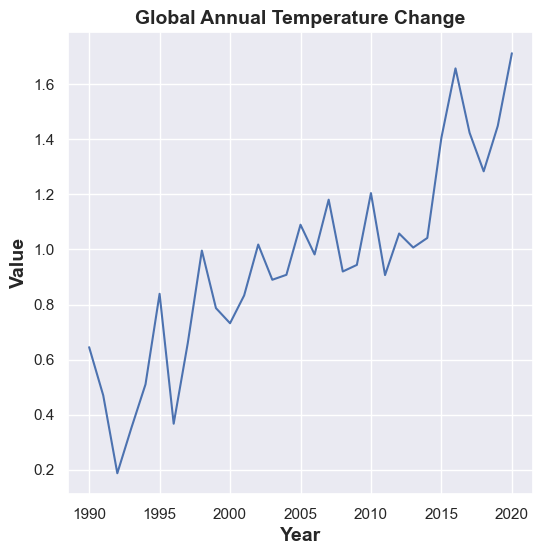

In [34]:
plt.figure(figsize=(6,6))

x = world_temp['Year']
y = world_temp['Value']

plt.plot(x,y)

plt.title("Global Annual Temperature Change",fontsize = 14, fontweight ='bold')
plt.xlabel("Year",fontsize = 14, fontweight ='bold')
plt.ylabel("Value",fontsize = 14, fontweight ='bold')

plt.show()
#world_temp.plot(x = 'Year',y='Value')

The graph above illustrates the annual rise in global temperature from 1990 to 2020. The graph above clearly shows that the global temperature change rose significantly over the year.

In [35]:
world_temp['Value'].describe()

count    31.000000
mean      0.950452
std       0.366732
min       0.187000
25%       0.759500
50%       0.944000
75%       1.135500
max       1.713000
Name: Value, dtype: float64

The code below finds the minimum and maximum temperature change value index position

In [36]:
min_value_pos = pd.Series(world_temp['Value']).idxmin()
max_value_pos = pd.Series(world_temp['Value']).idxmax()

print("Min pos: ", min_value_pos)
print("Max pos: ",max_value_pos)

Min pos:  2
Max pos:  30


The code below finds the minimum and maximum temperature changed year

In [37]:
print("Min_temp year: ",world_temp._get_value(2, 'Year'))
print("Max_temp year: ",world_temp._get_value(30, 'Year'))

Min_temp year:  1992
Max_temp year:  2020


Since 1990, the global temperature has risen at a rate of 0.95 degrees Celsius per year on average. The greatest degree change is 1.71 degrees Celsius in 2020, while the smallest degree change is 0.18 degrees Celsius in 1992. Even though a 0.95 degree increase looks to be reasonable, it would have severe effects for the earth. Natural disasters such as floods and heatwaves became more often as the temperature rose over the year, and they were more severe than the previous year.

## 4.1 Scatter Plot

### 4.1.1 How do $CO_{2}$ emissions effect global warming?

I will compare global temperature change and worldwide $CO_{2}$ emission figures from 1990 to 2020 to determine what relationship I can draw between these two values.

Text(0, 0.5, 'World Temperature Change')

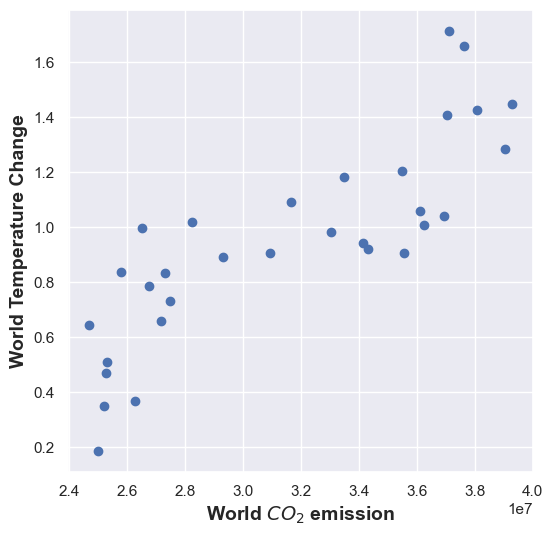

In [38]:
plt.figure(figsize=(6,6))

x = world_co2['Value']
y = world_temp['Value']
plt.scatter(x,y)

plt.xlabel('World $CO_{2}$ emission',fontsize = 14, fontweight ='bold')
plt.ylabel('World Temperature Change',fontsize = 14, fontweight ='bold')

From the scatter plot above, we can see that the global temperature change increased with an increase in world $CO_{2}$ emissions over the year. Carbon dioxide ($CO_{2}$) is a greenhouse gas that traps heat inside the earth's atmosphere, causing the earth to warm. $CO_{2}$ is an important component of the Earth's atmosphere, however too much $CO_{2}$ emission has negative effects such as global warming.

### 4.1.2 What is the relation between Agriculture Land Percentage and World Temperature Change?

I will compare global temperature change and worldwide agriculture land percentage mean figures from 1990 to 2020 to determine what relationship I can draw between these two values.

Text(0, 0.5, 'World Temperature Change')

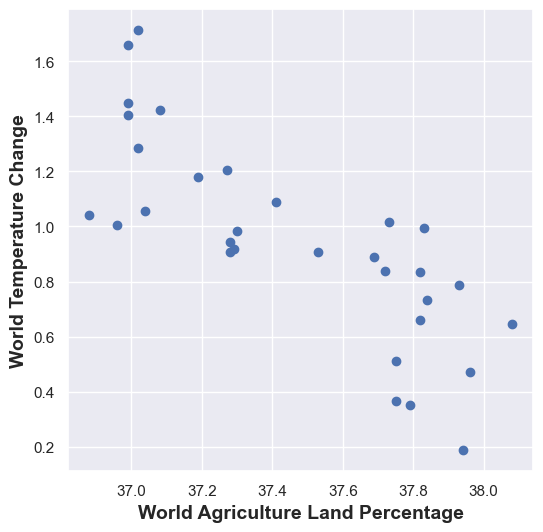

In [39]:
plt.figure(figsize=(6,6))

x = landpc_mean['Value']
y = world_temp['Value']
plt.scatter(x,y)

plt.xlabel('World Agriculture Land Percentage',fontsize = 14, fontweight ='bold')
plt.ylabel('World Temperature Change',fontsize = 14, fontweight ='bold')

From the scatter plot above, we can observe that the world agriculture land percentage decreased with an increased in the world temperature change.

### Puerto Rico Data

Data from Puerto Rico will be used as an example to demonstrate how climate change affects agricultural supply. It was selected as an example because of the huge land percentage difference between 1990 and 2020 calculated in the above "Statistics Math Counting" category cell.[[2]](#statistics)

In [40]:
# finds 'Puerto Rico' data from the World Agriculture Land Percentage dataset 
rico_data = world_agri_pc.loc[world_agri_pc['Country Name'] == 'Puerto Rico']
rico_data

,index,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
183,192,Puerto Rico,PRI,Agricultural land (% of land area),AG.LND.AGRI.ZS,49.041714,47.35062,46.223224,35.062007,34.836528,...,22.040586,22.187148,21.668546,21.149944,20.631342,20.11274,19.594138,19.041714,18.928974,18.928974


In [41]:
rico_land_pc = []

# retrieve 'Puerto Rico' Agriculture Land Percentage value from 1990 to 2020
for col in rico_data.columns[5:]:
    rico_land_pc.append(rico_data[col].values[0])

Text(0, 0.5, 'Puerto Rico Temperature Change')

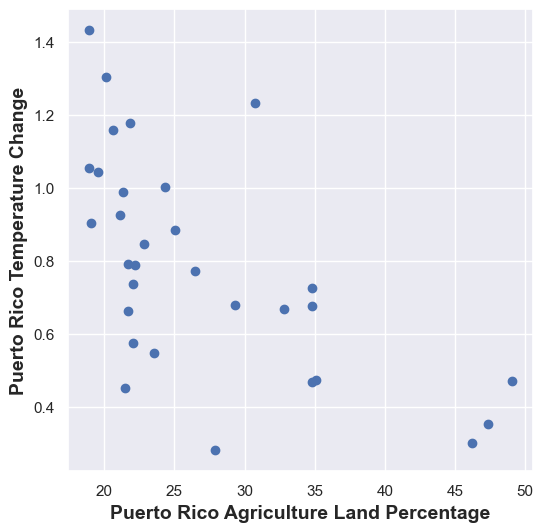

In [42]:
plt.figure(figsize=(6,6))

x = rico_land_pc
y = rico_temp['Value']
plt.scatter(x,y)

plt.xlabel('Puerto Rico Agriculture Land Percentage',fontsize = 14, fontweight ='bold')
plt.ylabel('Puerto Rico Temperature Change',fontsize = 14, fontweight ='bold')

From the graph above, it shows that as the temperature rises, the percentage of agricultural land decreases. We can notice that the graph pattern is similar to the one shown above for Agriculture Land Percentage vs. World Temperature Change.

## 4.2  How has climate change influenced the occurrence of natural disasters?
### 4.2.1 Barplot
I will be showing the number of people affected by natural disasters in Puerto Rico from 1990 to 2020.

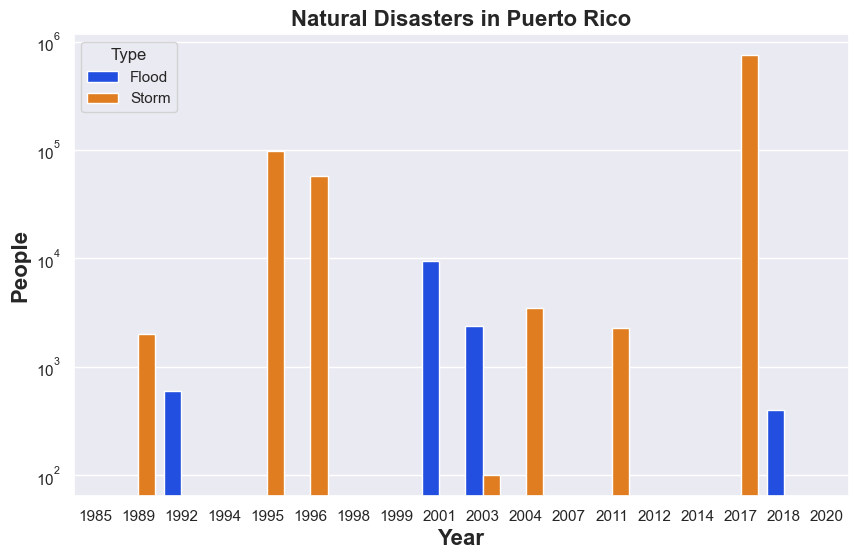

In [43]:
plt.gcf().set_size_inches(10, 6)

df1=pd.DataFrame({'x':rico_hazard['Category'],'y':rico_hazard['Flood']})
df2=pd.DataFrame({'x':rico_hazard['Category'],'y':rico_hazard['Storm']})

df1['Type']= 'Flood'
df2['Type']= 'Storm'
res=pd.concat([df1,df2])
ax = sns.barplot(data= res, x ='x', y ='y',hue='Type',palette='bright')

# set the y-axis scale to the value of 'log'
ax.set_yscale("log")
# set the the title, x and y label of the graph
ax.set_title('Natural Disasters in Puerto Rico',fontsize = 16, fontweight ='bold')
ax.set_xlabel('Year',fontsize = 16, fontweight ='bold')
ax.set_ylabel('People',fontsize = 16, fontweight ='bold')

plt.show()

According to the graph above, the natural disasters in Puerto Rico have occurred more frequently over time. The number of persons affected is constantly increasing, with the largest number of people affected displayed on the graph reaching over 1,000,000 in 2017. The frequent occurrence of storms and floods is also one of the impacts of climate change. One of the consequences of storms and floods is that they make agricultural land unfit for cultivation, resulting in lower crop yields.

## 4.3 Handling Outlier
We can see from the Puerto Rico Agriculture Land Percentage vs. Puerto Rico Temperature Change scatter plot above that there is an outlier that is far distant from the other dot. This means that the dot could be a data collecting error or simply a sign of variation in your data. As far as I can tell, the data is simply an indicator of fluctuation, because temperature and agricultural land percentage value are not things we can forecast or work with based on a pattern.

* Puerto Rico Agriculture Land Percentage vs. Puerto Rico Temperature Change scatter plot

### 4.3.1 Find the position
The code below finds the x and y positions of the outlier found in the scatter plot above.

In [44]:
# find the x position of the outlier
for x in range(0,len(rico_land_pc)):
    if (rico_land_pc[x]>30) & (rico_land_pc[x]<33):
        loc_x = x
    
# finds the y position of the outlier
loc_y = np.where((rico_temp['Value']>1.2) & (rico_temp['Value']<1.3))

print('x-position is at index:',loc_x)
print('y-position:',loc_y)


x-position is at index: 8
y-position: (array([8], dtype=int64),)


In [45]:
# find the x and y position value
temp_value = rico_temp['Value']
print('x-position value:',temp_value[8])
print('y-position value:',rico_land_pc[8])

x-position value: 1.232
y-position value: 30.7215332581736


## 4.3 Heat Map
### 4.3.1 What is the correlation between temperature change, $CO_{2}$ emission and agriculture land percentage?
The graph above provides a detailed examination of the relation between two variables, however examining each pair of two variables separately to see whether there is an intriguing link is not necessarily the ideal strategy.

I will be using the new world data dataframe that I made by appending three separate pieces of data from three different dataframes. The dataframe contains the values of world temperature change, world $CO_{2}$ emissions, and world agriculture land percentage from 1990 to 2020.  I'll be using a heatmap to visualise the relationship between the three variables. Correlation describes how one variable influences another. This enables us to determine how changes in one variable will affect the other variables.

<AxesSubplot:>

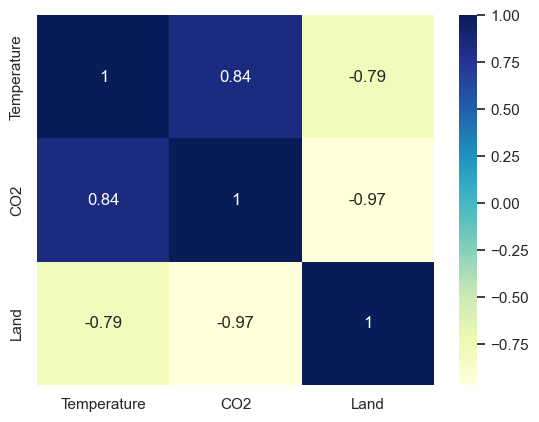

In [46]:
sns.heatmap(world_data.corr(), cmap="YlGnBu", annot=True)

The above map shows that world temperature change, world $CO_{2}$ emissions, and world agricultural land percentage all have a strong correlation coefficient and influence each other. Temperature and $CO_{2}$ emissions are positively correlated, but land is negatively correlated. A positive correlation occurs when one variable increases or decreases, the other variable increases or decreases as well. A negative correlation occurs when one variable rises or falls while the other variable falls does reverse.

## 4.4 Pair Grid
I will be creating a "Pair Grid" for world temperature change, $CO_{2}$ emissions, and agricultural land percentage. I have decided to include a histplot, scatterplot, and regplot in the pair grid. On both the x and y axes, each variable will be plotted against itself. The scatterplot on the grid's lower side has been examined in depth in the preceding cell. I will plot the histplot on the diagonal of the grid and reglot on the upper side of the grid.


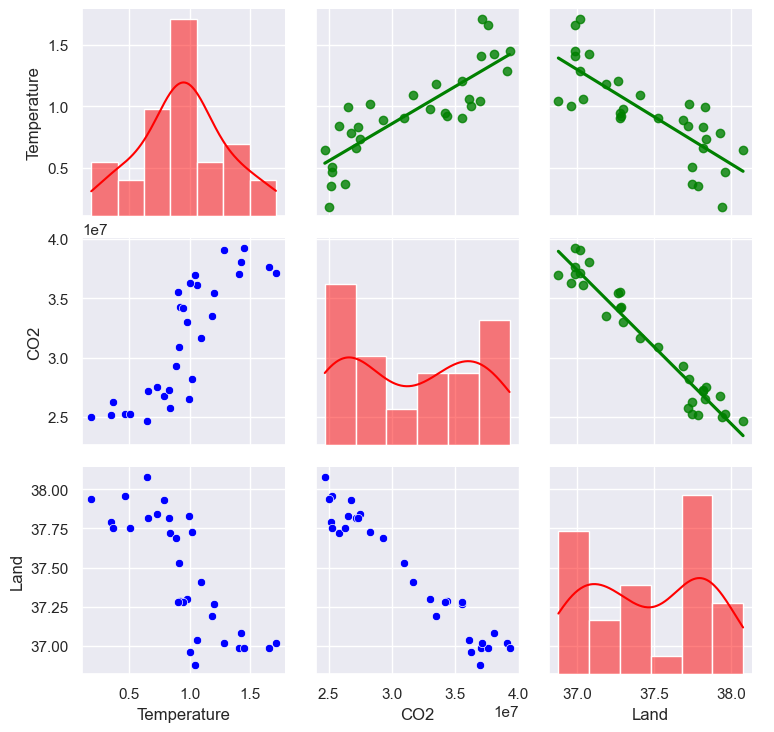

In [47]:
g = sns.PairGrid(world_data)
g.map_diag(sns.histplot, color='red',kde=True)
g.map_lower(sns.scatterplot, color='blue')
g.map_upper(sns.regplot, ci=False, color='green')
g.add_legend()

We can notice some interesting trends developing, which we can research deeper during the project's second phase:

* How much of global $CO_{2}$ emission does it cause the world temperature to rise. From the data analysis, when looking at the correlation coefficient we can know that the variables are highly related but we does not know how much of $CO_{2}$ emissions will really cause an impact to the global temperature change
* Instead of collective patterns, the majority of the country has its own climate trend with quite diverse gradients. When examining relationships, we should continue to consider each region and country separately in order to gather useful information.


# 5 Summary
## 5.1 Conclusions
We discovered that there is a relation between climate change and agricultural land percentage using exploratory data analysis. As agricultural land declines due to climate change, this has a significant influence on agricultural supplies. This is because there is less agricultural area available to plant crops to meet consumer demand. Food shortages have resulted in various countries. We can observe that the data has linkages and trends that make it suitable for further research. This has proven that my hypothesis about how climate change impacts the agriculture supply is true.

Within the project, it would be beneficial to look into machine learning analysis tools to determine the best technique for data collection, as the current strategy is solely based on what the open source website provides.

# 6 References and Resources
<a id ='references'></a>
## 6.1 References
* © FAO (n.d.). World Temperature Change, World CO2 emissions and Puerto Rico Temperature Change. Food and Agriculture Organization of the United Nations. Retrieved December 1, 2022, from https://www.fao.org/faostat/en/#compare
* (n.d.). World Agriculture Land Percentage. The World Bank. Retrieved December 1, 2022, from https://data.worldbank.org/indicator/AG.LND.AGRI.ZS
* (n.d.). Puerto Rico Natural Hazard Statistics. Climate Change Knowledge Portal. Retrieved December 1, 2022, from https://climateknowledgeportal.worldbank.org/country/puerto-rico/vulnerability
* R. (2022, July 12). Japanese wasabi farmers fear for future amid climate change. Channel News Asia. Retrieved December 1, 2022, from <a id="news">https://www.channelnewsasia.com/asia/wasabi-farm-japan-global-warming-2803416<a>


## 6.2 Resources Used
### 6.2.1 Data cleaning and processing, feature generation
* (2022, June 8). Working with Missing Data in Pandas. Geeks for Geeks. Retrieved December 14, 2022, from https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
* (n.d.). Pandas Dataframe. W3 Schools. Retrieved December 14, 2022, from https://www.w3schools.com/python/pandas/pandas_dataframes.asp

### 6.2.2 Exploratory data analysis
* Waskom, M. (n.d.). Seaborn: Statistical data visualization. Seaborn. Retrieved December 14, 2022, from https://seaborn.pydata.org/
* John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team (n.d.). Matplotlib example plots. Matplotlib. Retrieved December 26, 2022, from https://matplotlib.org/stable/gallery/index.html
* Vanshikagoyal43 (2020, November 12). How to create a seaborn correlation heatmap in Python? Geeks for Geeks. Retrieved December 28, 2022, from https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/